# MOW 323 

# Lanz Ebersohn


# u18285229

In [1]:
try:
    import os    
    if "add_engmod.py" in os.listdir(): 
        print("Exists!"); import add_engmod
        print("Development version is loaded. For office use only.")
except:
    pass
try:
    import importlib; 
    import engmod.structfem as sfem; importlib.reload(sfem)
    import numpy as np 
    try:
        from datetime import datetime
        print(str(datetime.time(datetime.now())),'-',str(datetime.date(datetime.now())))
        import os
        print(os.getcwd())
    except: 
        pass    
    
except Exception as e:
    print(e)
    print("Engmod is not imported. Please ensure that the jupyter notebook and engmod folder is in the same directory.")
import matplotlib.pyplot as plt 

14:28:47.736020 - 2021-11-04
E:\OneDrive\TUKS\2021-3rd year\env\Scripts\MOW323\ST2


In [2]:
E = 200E9
A = 0.010**2
density = 7800

In [3]:

nodecoor = np.array([
                    [0,0],
                    [4,-1],
                    [8,0],
                    [4,-3]])

elemconn = np.array([
                    [0,1],
                    [0,3],
                    [1,2],
                    [1,3],
                    [2,3]])

prescribed_displacement = np.array([
                                    [0,0,0],
                                    [0,1,0],
                                    [2,0,0],
                                    [2,1,0]])

prescribed_force = np.array([[3,1,1000]])

element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}

fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00, -1.05864291e-21,  2.76623213e-04,
         0.00000000e+00,  0.00000000e+00,  6.80911898e-21,  2.92409327e-04]),
 'loads': array([ 877.14818471, -500.        ,    0.        ,    0.        ,
        -877.14818471, -500.        ,    0.        , 1000.        ])}

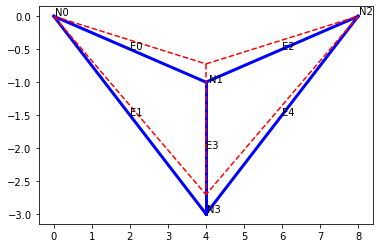

In [4]:
fmn.plot_system(show_displacement=True,magnification=1000)

## a.) Modal analysis 

[ 18.2 181.6 279.2]


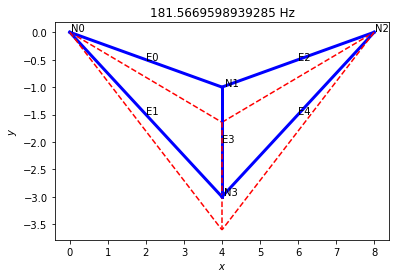

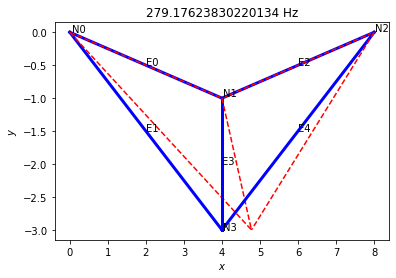

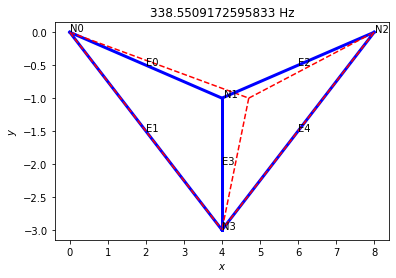

In [5]:
fmn.plot_modes()

w = 2*np.pi*np.array([18.2,181.6,279.2])
f = np.array([18.2,181.6,279.2])
print(f)

Since the first 2 natural frequencies of the structure correspond almost exactly to the last two of the given frequencies of 181.6 and 279.2 Hz, it will be one of them. Typically the first natural frequency will result in the largest amplification factor. Thus, 181.6 Hz will produce the largest frequency.

## b.) Increase in natural frequency

In [6]:
# original
element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}
fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()
print('Original frequencies:')
print(fmn.eigen()['natural_frequencies_hz'][0])

# decrease Crosectional area by 25%
element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A*1,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}
fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()
print('New frequencies for the decrese in cross sectional area:')
print(fmn.eigen()['natural_frequencies_hz'][0])
### Move node 3 up
nodecoor = np.array([
                    [0,0],
                    [4,-1],
                    [8,0],
                    [4,-2]])

element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A*1,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}
fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()
print('New frequencies for node 3 displayced upwards:')
print(fmn.eigen()['natural_frequencies_hz'][0])
### Move node 3 down
nodecoor = np.array([
                    [0,0],
                    [4,-1],
                    [8,0],
                    [4,-4]])

element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A*1,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}
fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()
print('New frequencies for node 3 displayced downwards:')
print(fmn.eigen()['natural_frequencies_hz'][0])

Original frequencies:
181.5669598939285
New frequencies for the decrese in cross sectional area:
181.5669598939285
New frequencies for node 3 displayced upwards:
208.5537826472789
New frequencies for node 3 displayced downwards:
160.7597301118987


## c.) Calc steady state sol displaycement and stress

In [7]:
# original
nodecoor = np.array([
                    [0,0],
                    [4,-1],
                    [8,0],
                    [4,-3]])
element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}
fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

fmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00, -1.05864291e-21,  2.76623213e-04,
         0.00000000e+00,  0.00000000e+00,  6.80911898e-21,  2.92409327e-04]),
 'loads': array([ 877.14818471, -500.        ,    0.        ,    0.        ,
        -877.14818471, -500.        ,    0.        , 1000.        ])}

Stresses in elements numbered:
[ 5.97056245 12.24662565  5.97056245  0.27782608 12.24662565] MPa


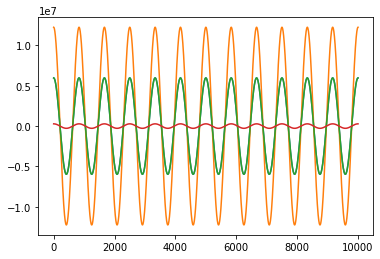

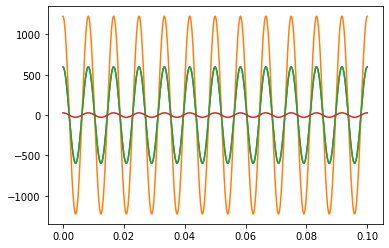

In [8]:
t = np.linspace(0,10,10000)

_,Ff,_ = fmn.make_force_global(3,1,-1000)
Ff
Mff,Kff = fmn.dynamic_make_matrices()
w = 2 * np.pi * 120

A_m = (Kff - w**2 * Mff)

Us = np.linalg.solve(A_m,Ff)

stress = []

t = np.linspace(0,0.1,10000)
for idx in range(len(t)):

    Ut = np.real(Us * np.exp(1j * w * t[idx]))

    Ug = fmn.dynamic_make_global_displacement(Ut)

    dict_ss = fmn.post_stress_strain(displacement=Ug)

    stress.append(dict_ss["stress"])    
    
stress = np.array(stress)

plt.figure(1)
plt.plot(stress[:,0])
plt.plot(stress[:,1])
plt.plot(stress[:,2])
plt.plot(stress[:,3])


plt.figure(2)
plt.plot(t,stress[:,0] * A)
plt.plot(t,stress[:,1] * A)
plt.plot(t,stress[:,2] * A)
plt.plot(t,stress[:,3] * A)

print('Stresses in elements numbered:')
print(dict_ss["stress"]/1E6,"MPa") 

## e.) Safety factors 

In [13]:
fmn.post_print_solution(Ug)

Se = 165
Sy = 300
Sut = 500

stress_a = np.max((stress),axis = 0)/1E6 
stress_m = 0

n_fs = (Sy/(stress_a + stress_m))
print('Safety factors for the farious elements:')
n_fs

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -1558.959690, F_y: 879.604948
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: -0.507498 x 10^-3, F_x: 0.000000, F_y: -261.832211
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 1558.959690, F_y: 879.604948
                     Node 3                     
u_x: -0.000000 x 10^-3, u_y: -0.510276 x 10^-3, F_x: -0.000000, F_y: -1497.377686

                     Element 0                     
stress: 5.970562 x 10^6, strain: 0.000030
                     Element 1                     
stress: 12.246626 x 10^6, strain: 0.000061
                     Element 2                     
stress: 5.970562 x 10^6, strain: 0.000030
                     Element 3                     
stress: 0.277826 x 10^6, strain: 0.000001
                     Element 4                     
stress: 12.246626 x 10^6, strain: 0.000061
Safety fa

array([  50.24652245,   24.49654367,   50.24652245, 1079.81224079,
         24.49654367])

## Backup of code if you want to revert back to the original code, copy this and paste this into you cell.

```python
nodecoor = np.array([
                    [0,0],
                    [4,-1],
                    [8,0],
                    [4,-3]])

elemconn = np.array([
                    [0,1],
                    [0,3],
                    [1,2],
                    [1,3],
                    [2,3]])

prescribed_displacement = np.array([
                                    [0,0,0],
                                    [0,1,0],
                                    [2,0,0],
                                    [2,1,0]])

prescribed_force = np.array([[3,1,1000]])

element_properties_dict = {
    "A": np.ones(elemconn.shape[0])*A,    
    "density": np.ones(elemconn.shape[0])*density,    
    "E": np.ones(elemconn.shape[0]) * E
}

fmn = sfem.FEM_Truss_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )

```